### Brain tumor Detection through Image Processing

In [34]:
import cv2
import PIL,pathlib
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


In [35]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/TARP project/dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
data_dir = pathlib.Path("/content/dataset")
yes = list(data_dir.glob('yes/*'))
img_pil = PIL.Image.open(str(yes[15]))


width: 272 pixels
height: 331 pixels
channels: 3


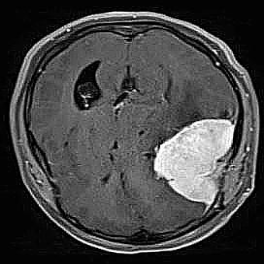

In [43]:
img_path = "/content/dataset/yes/y1015.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))
dim=(264,264)
image=cv2.resize(image, dim)
cv2_imshow(image)

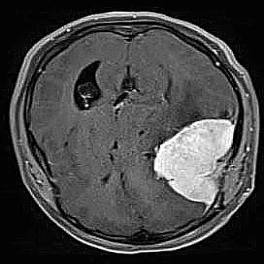

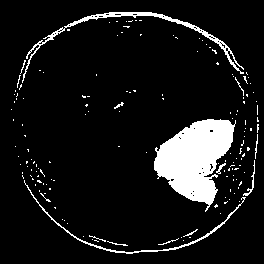

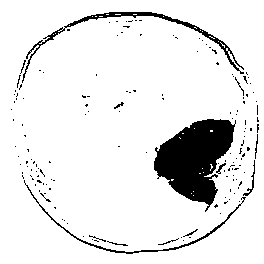

In [44]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
cv2_imshow(gray)
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
(T, threshInv) = cv2.threshold(gray, 155, 255,cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv)

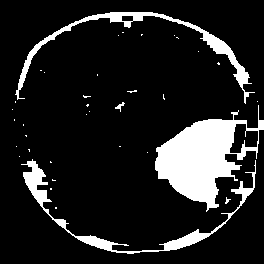

In [45]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

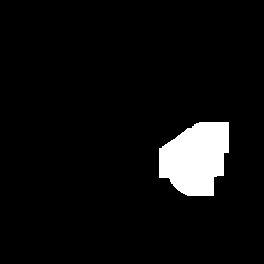

In [46]:
closed = cv2.erode(closed, None, iterations = 14)
closed = cv2.dilate(closed, None, iterations = 13)
cv2_imshow(closed)

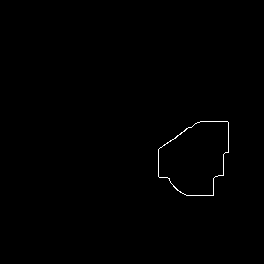

In [47]:
def auto_canny(image, sigma=0.10):
     #compute median of image thresholds
     v = np.median(image)

     #apply automatic canny edge detection using the computed median
     lower = int(max(0,(1.0 - sigma) * v))
     upper = int(min(255, (1.0 + sigma) * v))
     edged = cv2.Canny(image, lower, upper)

     #return the edged image
     return edged
canny = auto_canny(closed)
cv2_imshow(canny)

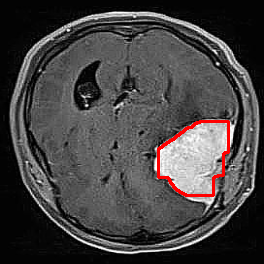

In [48]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
cv2_imshow(image)